# Binary Town 


Consider a town that contains only kids and adults. Each person in this town is associated with a height. Also, the probability of a random person in this town being a kid is $pKid$ and that of being an adult is $pAdult=1-pKid$. 

(a) Simulate 1000 people in this town by taking $pKid=0.4$. Assume that the height of any person is a value from the set $htSet=\{4.9,5.0,5.1,5.2,5.3,5.4,5.5, 5.6, 5.7, 5.8\}$. Also,  the probability that a person has a specific height given that the person is a kid is given by $pHtKid=[0.1, 0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1, 0.1]$ and the probability that a person has a specific height given that the person is an adult is given by $pHtAdult=[0.02, 0.02, 0.02, 0.02, 0.02, 0.18, 0.18, $ $0.18, 0.18, 0.18]$. That is, the probability that a kid has height $5.1$ is $0.1$, the probability that an adult has height $5.4$ is $0.18$ and so on. Show the histograms of heights of both the groups in different colors in a single plot. 

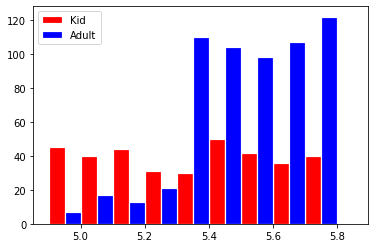

In [21]:
from numpy.random import choice
import numpy as np
import matplotlib.pyplot as plt
pKid = 0.4
ppl = choice([0, 1], 1000, p = [pKid, 1-pKid])         #this list stores which kind is this person, 0 means kid,1 means adult
htSet = [4.9,5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8]      #the set of all possible heights
pHtKid = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]     #storing the given probabilities of height
pHtAdult = [0.02,0.02,0.02,0.02,0.02,0.18,0.18,0.18,0.18,0.18]
kidhts = []                   #this list will store the heights of all kids
adulthts = []                 #this list will store the heights of all adults
hts = []                      #this list will store the heights of all people
for i in range(len(ppl)):
    if ppl[i]==0:                                       #if the person is kid
        kidhts.append(choice(htSet, 1, p = pHtKid)[0])  #randomly selecting a height from height set with the weighted probability
        hts.append(kidhts[-1])                          #appending the same value to the list with heights of all people
    else:                                               #if this person is adult, repeat the same with different probability
        adulthts.append(choice(htSet, 1, p = pHtAdult)[0])
        hts.append(adulthts[-1])

plt.hist(kidhts, color='Red', label='Kid', linewidth=1.2, width=0.05, edgecolor='White', bins=np.arange(4.9, 5.9, 0.1))        #plotting the results
plt.hist(adulthts, color='Blue', label='Adult', linewidth=1.2, width=0.05, edgecolor='White', bins=np.arange(4.95, 5.95, 0.1))
plt.legend()
plt.show()

(b) Implement an agent that classifies each sample generated in part (a) as kid or adult using Bayes' Rule. Measure the accuracy of the classifier in terms of the fraction of correct predictions. You may assume that the agent knows $pKid$, $htSet$, $pHtKid$ and $pHtAdult$.

In [22]:
from numpy.random import choice
pH = []           
bayes=[]
for i in range(len(htSet)):
    pH.append(hts.count(htSet[i])/1000)   #this list will store the probability of a specific height by the frequency

for i in range(1000):
    ind = htSet.index(hts[i])          #finding the index of each height in hts, in the htSet
    phk = (0.4*pHtKid[ind])/pH[ind]    #bayes' rule, by getting the value of pH at the corresponding index
    pha = (0.6*pHtAdult[ind])/pH[ind]  #the same bayes' rule expression, for all adults
    if(phk>=0.5):
        temp = 0
    else:
        temp = 1
    bayes.append(temp)   #this list will store the predictions according to the bayes' rule
#print(bayes)
accuracy = 0
for i in range(len(bayes)):    #calculating its accuracy
    if(bayes[i]==ppl[i]):
        accuracy += 1
print(f"The accuracy of bayes' rule predictions is {accuracy/1000}")

The accuracy of bayes' rule predictions is 0.731


(c) Assume that the height of a person can take on any value in $\mathbb{R}$. Repeat parts (a) and (b) when probability distributions of height given kid and height given adult are given by $f_{h|k}(x) =
\begin{cases}
  1 & \text{if } 4.5 \leq x \leq 5.0 \\
  2 & \text{if } 5.0 \leq x \leq 5.25 \\
  0 & \text{otherwise}
\end{cases}$ and $f_{h|a}(x) =
\begin{cases}
  2 & \text{if } 5.0 \leq x \leq 5.25 \\
  1 & \text{if } 5.25 \leq x \leq 5.75 \\
  0 & \text{otherwise}
\end{cases}$
    
  

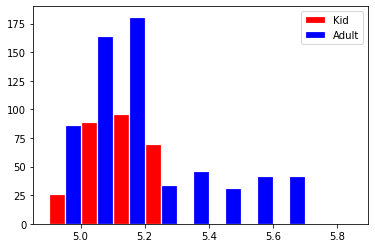

In [23]:
import random
from numpy.random import choice
import numpy as np
import matplotlib.pyplot as plt
def cdf(prob, ka):    #returns height for a given probability
    if prob <= 0.5:
        if ka == 0:   #if the person is a kid
            ht = 4.5 + prob         #the case where height is from 4.5 to 5 for a kid
        if ka == 1:   #if the person is an adult
            ht = (prob + 10) / 2    #the case where height is from 5 to 5.25 for an adult
    else:
        if ka == 0:     
            ht = (prob + 9.5) / 2   #the case where height is from 5 to 5.25 for a kid
        if ka == 1:
            ht = prob + 4.75        #the case where height is from 5.25 to 5.75 for an adult
    return ht

ppl = choice([0, 1], 1000, p = [0.4, 0.6])    #this list stores which kind is this person, 0 means kid,1 means adult
nhts = []                                     #this list will store the heights of all people
nkidhts = []                                  #this list will store the heights of all kids
nadulthts = []                                #this list will store the heights of all adults

for i in range(1000):
    a=random.uniform(0,0.5)
    b=random.uniform(0.5,1)
    if ppl[i]==0:
        prob = np.random.choice([a,b],1,p=[1/3,2/3])[0] #the values 1/3 and 2/3 are as per the given probability
        ht = cdf(prob, 0)           #the second parameter is for kid/adult
        nhts.append(ht)             #appending in the height list
        nkidhts.append(ht)          #appending in the kids' height list
    else:                           #repeating the similar procedure for adult
        prob = np.random.choice([a,b],1,p=[2/3,1/3])[0]
        ht = cdf(prob, 1)
        nhts.append(ht)
        nadulthts.append(ht)
        
plt.hist(nkidhts, color='Red', label='Kid', linewidth=1.2, width=0.05, edgecolor='White', bins=np.arange(4.9, 5.9, 0.1))
plt.hist(nadulthts, color='Blue', label='Adult', linewidth=1.2, width=0.05, edgecolor='White', bins=np.arange(4.95, 5.95, 0.1))
plt.legend()
plt.show()

In [24]:
#(b) part for c
from numpy.random import choice

def prob(ht, ka):     #this function returns the probability as per the given input of height and the type of function
    if ka == 0:
        if ht >= 4.5 and ht <= 5:    #in this range only kid has a non zero probability, hence the return is 1
            return 1
        elif ht >= 5 and ht <= 5.25: #the return 0.4 is as per the given value of pKid
            return 0.4
        else:                        #else return 0
            return 0
    else:
        if ht >= 5 and ht <= 5.25:   #the value 1-pKid
            return 0.6
        elif ht >= 5.25 and ht <= 5.75:  #in this range only adult has a non zero probability, hence the return is 1
            return 1
        else:
            return 0

nbayes = []   #list to store the predictions according to bayes' rule
for i in range(len(nhts)):
    nphk = prob(nhts[i], 0)   #for each height in nhts, we get the probability from the function for both kid and adult
    npha = prob(nhts[i], 1)
    if nphk>=0.5:
        temp = 0
    else:
        temp = 1
    nbayes.append(temp)    #appending the majority selection in the prediction list
accuracy = 0
for i in range(1000):    #finding the accuracy
    if ppl[i]==nbayes[i]:
        accuracy += 1
print(f"The accuracy of bayes' rule predictions is {accuracy/1000}")

The accuracy of bayes' rule predictions is 0.745


(d) Assume that each person in the town has two attributes - height and weight that take on values from $\mathbb{R}$. The 
probability distributions of height given kid and height given adult are $N(\mu_{11},\sigma_{11}^2)$ and $N(\mu_{21},\sigma_{21}^2)$, respectively. Similarly, The 
probability distributions of weight given kid and weight given adult are $N(\mu_{12},\sigma_{12}^2)$ and $N(\mu_{22},\sigma_{22}^2)$, respectively. Here $N(\mu,\sigma^2)$ denotes the Gaussian distribution with mean $\mu$ and standard deviation $\sigma$. Assume that the attributes height and weight are conditionally independent given the category (adult or kid). Simulate 1000 people in this town assuming $pKid=.4$, $\sigma_{11}=\sigma_{21}=1$, $\sigma_{12}=\sigma_{22}=10$, $\mu_{11}=2.5,\mu_{12}=20,\mu_{21}=5,\mu_{22}=40$. Note that you may have to discard a  sample $(x_1,x_2)$ if either $x_1 <0$ or $x_2 <0$. Plot the scatter plot of the samples (height in the X-axis and weight in the Y-axis). 





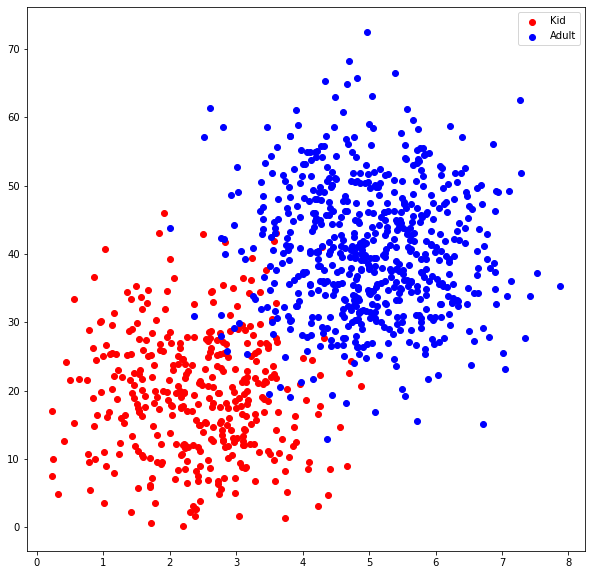

In [1]:
import random
from numpy.random import choice
import numpy as np
import matplotlib.pyplot as plt

ppl = np.random.choice([0,1],1000,p=[0.4,0.6])    #this list stores which kind is this person, 0 means kid,1 means adult

ghts = []                  #storing all heights
whts = []                  #storing all weights
gprobkid = []              #storing height for kid
wprobkid = []              #storing weight for kid
gprobadult = []            #storing height for adult
wprobadult = []            #storing weight for adult
nppl = []                  #making a copy of the original ppl list for next question
for i in range(1000):      #for each person
    if ppl[i] == 0:        #if the person is a kid
        hk = np.random.normal(2.5, 1, 1)  #random height and weight using numpy
        wk = np.random.normal(20, 10, 1)  
        if hk < 0 or wk < 0:              #discarding the negative values
            continue
        else:
            gprobkid.append(hk)           #storing the values in corresponding lists
            wprobkid.append(wk)
            ghts.append(hk)
            whts.append(wk)
            nppl.append(ppl[i])
    else:                  #if the person is adult
        ha = np.random.normal(5, 1, 1)    #random height and weight using numpy
        wa = np.random.normal(40, 10, 1)
        if ha < 0 or wa < 0:              #discarding the negative values
            continue
        else:
            gprobadult.append(ha)         #storing the values in corresponding lists
            wprobadult.append(wa)
            ghts.append(ha)
            whts.append(wa)
            nppl.append(ppl[i])

plt.figure(figsize=(10,10))
plt.scatter(gprobkid, wprobkid, c='Red', label='Kid')          #plotting the result
plt.scatter(gprobadult, wprobadult, c='Blue', label='Adult')
plt.legend()
plt.show()

(e) Let $S$ denote the set of samples generated in part (d). Given a height-weight pair $(x, y)$, write a function that finds $k$ nearest points in $S$ for each $k \in \{ 5, 10, 15\}$. The distance between $(x, y)$ and $(x_i, y_i)$ is defined as $\sqrt{(x_i-x)^2 + (y_i-y)^2}$. For each $k$, show a scatter plot with $(x, y)$ in one color, its $k$ nearest points in another color and the other points in $S$ in a third color. Also, use the $k$ nearest points of $(x, y)$ and the majority function to classify $(x, y)$ as  belonging to a kid or an adult. 

Enter height : 5
Enter weight : 4
The prediction is that the given point 5 and 4 is representing a kid
The prediction is that the given point 5 and 4 is representing a kid
The prediction is that the given point 5 and 4 is representing a kid


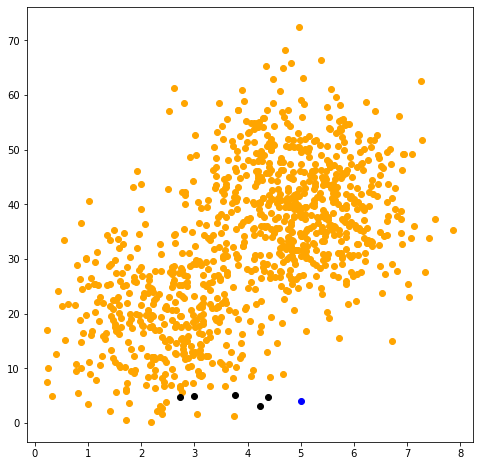

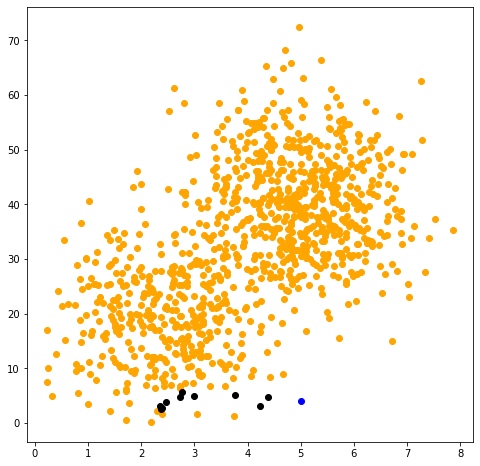

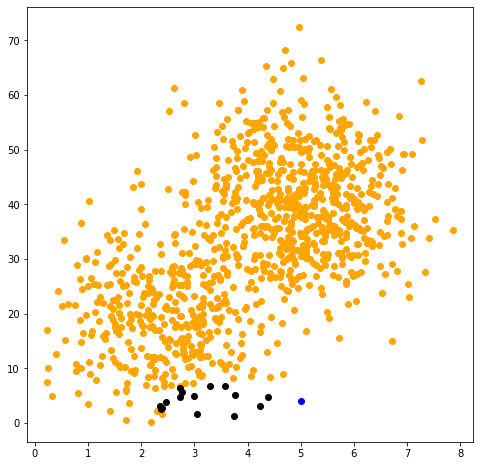

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def majority_class(neigh_ht, neigh_wt):     #returns the majority class, by calculating the mode
    kid_c, adult_c = 0, 0
    for i in range(len(neigh_ht)):          #for each height in the neihghbor
        if neigh_ht[i] in gprobkid:         #if the person is a kid
            temp = []                       
            for j in range(len(gprobkid)):   #we will find the indices of the neighbors in the original list
                if gprobkid[j]==neigh_ht[i]: 
                    temp.append(j)
            for j in range(len(temp)):       
                if wprobkid[temp[j]]==neigh_wt[i]:  #if the weight is also found, we increase the count of number of kids by 1
                    kid_c += 1
                    break
        if neigh_ht[i] in gprobadult:       #if the person is an adult
            temp = []
            for j in range(len(gprobadult)): #we will find the indices of the neighbors in the original list
                if gprobadult[j]==neigh_ht[i]:
                    temp.append(j)
            for j in range(len(temp)):
                if wprobadult[temp[j]]==neigh_wt[i]: #if the weight is also found, we increase the count of number of kids by 1
                    adult_c += 1
                    break
    if kid_c > adult_c:              #if the number of kids are more
        return 0
    elif kid_c < adult_c:            #if the number of adults are more
        return 1
    else:                            #else return one
        return -1

hIn = int(input("Enter height : "))  #taking the input
wIn = int(input("Enter weight : "))
#hIn = 1
#wIn = 1
k_list = [5, 10, 15]

for k in k_list:     #for each value of k
    neigh_ht = []    #storing the heights of minimum distance neighbors
    neigh_wt = []    #storing the weights of minimum distance neighbors
    dist = []        #this list stores the distance of each point
    tghts = ghts.copy()
    twhts = whts.copy()
    tppl = nppl.copy()
    for i in range(len(tghts)):   #getting the distance for each point
        dist.append(((tghts[i]-hIn)**2+(twhts[i]-wIn)**2)**0.5)
    
    for i in range(k):    #getting the k nearest neighbors
        min_ind = dist.index(min(dist))   #getting the index of minimum distance neighbor
        neigh_ht.append(tghts[min_ind])    #storing the corresponding values in the lists
        neigh_wt.append(twhts[min_ind])
        dist.remove(dist[min_ind])        #removing the current values for next iteration
        tghts.remove(tghts[min_ind])
        twhts.remove(twhts[min_ind])
        tppl.remove(tppl[min_ind])
         
    plt.figure(figsize=(8,8))               #plotting for the current value of k
    plt.scatter(hIn, wIn, color='blue')
    plt.scatter(tghts, twhts, color='orange')
    plt.scatter(neigh_ht, neigh_wt, color='black')
    #plt.show()
    prediction = majority_class(neigh_ht, neigh_wt)     #making the prediction as per the majority function
    if prediction == 0:                          #printing the corresponding prediction
        print(f"The prediction is that the given point {hIn} and {wIn} is representing a kid")
    elif prediction == 1:
        print(f"The prediction is that the given point {hIn} and {wIn} is representing an adult")
    else:
        print(f"The prediction is that the given point {hIn} and {wIn} is representing no majority")